<font size=6>

    DAV Project
    Names - Ronit(19/19058)
    Dataset - 'Netflix data 2016-2021'

# Importing Libs and Dataset

In [ ]:
# making drive connection
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/DAV Lab')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import spacy
import wordcloud
from collections import Counter
warnings.filterwarnings('ignore')

In [ ]:
#pip install plotly --upgrade

In [ ]:
#importing dataset and displaying basic info
df = pd.read_csv("netflix.csv")
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Boxoffice,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,IMDb Link,Summary,IMDb Votes,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,"$2,122,065",98.0,74.0,57.0,12-Dec-08,3/4/2021,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,"$70,632",79.0,1.0,NaN,8-May-20,3/4/2021,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,"$16,263",NaN,NaN,NaN,28-Aug-20,3/4/2021,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,1-Oct-16,3/4/2021,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,22-Sep-11,3/4/2021,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


# Data Cleaning

In [ ]:
df.columns.values

array(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score', 'Boxoffice',
       'Rotten Tomatoes Score', 'Awards Received', 'Awards Nominated For',
       'Release Date', 'Netflix Release Date', 'IMDb Link', 'Summary',
       'IMDb Votes', 'Poster', 'TMDb Trailer', 'Trailer Site'],
      dtype=object)

In [ ]:
df = df.drop(columns=['IMDb Link','Poster','TMDb Trailer','Trailer Site'])
df.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Boxoffice,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Released_Year,Released_Year_Netflix,Month_added
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,"$2,122,065",98.0,74.0,57.0,2008-12-12,2021-03-04,A med student with a supernatural gift tries t...,205926.0,2008.0,2021,3


<font size=4>

* Tag: List of tags on the movie/series.
* Language: Indicates in which language the movie/series is available
* Hidden Gem Score: This is a score that suggests if this movie/series is a hidden gem , something that is not mainstream but is a great product and may deserve more attention.
* Director: Tells whos was the Director
* Writer: Tells the names of the writters.
* Actors: Tells us the main actors.
* IMDb Score: This is the score given by IMDb,
* Rotten Tomatoes Score: This is the score given by Rotten Tomatoes.
* Awards Received: It tells us how many awards this movie/series has received.
* Awards Nominated For: It tells us how many awards this movie/series has been nominated for.
* Release Date: It indicates when the movie/series was released(original releast date).
* Netflix Release Date: It indicates when the movie/series was released on Netflix.
* Summary: Gives us a little summary of the plot of for the movie/series.
* IMDb Votes: Number of votes on particular movie/show.


In [ ]:
df.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes,Released_Year,Released_Year_Netflix,Month_added
count,13379.000000,13381.000000,6382.000000,6075.000000,7661.000000,1.337900e+04,13373.000000,15480.000000,15480.000000
mean,5.937551,6.496054,59.523034,8.764444,13.983161,4.272841e+04,2012.613774,2017.874806,6.632364
std,2.250202,1.146910,26.999173,18.311171,29.821052,1.257012e+05,10.231365,1.965452,3.501763
min,0.600000,1.000000,0.000000,1.000000,1.000000,5.000000e+00,1971.000000,2015.000000,1.000000
25%,3.800000,5.800000,38.000000,1.000000,2.000000,4.035000e+02,2009.000000,2016.000000,4.000000
50%,6.800000,6.600000,64.000000,3.000000,5.000000,2.322000e+03,2015.000000,2018.000000,6.000000
75%,7.900000,7.300000,83.000000,8.000000,12.000000,2.089050e+04,2018.000000,2020.000000,10.000000
max,9.800000,9.700000,100.000000,300.000000,386.000000,2.354197e+06,2070.000000,2021.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Boxoffice              4007 non-null   object 
 14  Rotten Tomatoes Score  6382 non-null   float64
 15  Aw

In [ ]:
#Types of Columns present
cat_cols = [cols for cols in df if df[cols].dtypes=='O']                    
num_cols = [cols for cols in df if df[cols].dtypes=='float64']             
print('1. Category Columns :',cat_cols)
print('2. Continuous Columns :',num_cols)

1. Category Columns : ['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie', 'Country Availability', 'Runtime', 'Director', 'Writer', 'Actors', 'View Rating', 'Boxoffice', 'Release Date', 'Netflix Release Date', 'Summary']
2. Continuous Columns : ['Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score', 'Awards Received', 'Awards Nominated For', 'IMDb Votes']


In [ ]:
#Changing Dates to datetime vals
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])

In [ ]:
#Creating Year cols 
df['Released_Year'] = pd.DatetimeIndex(df['Release Date']).year
df['Released_Year_Netflix'] = pd.DatetimeIndex(df['Netflix Release Date']).year
df.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Boxoffice,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Released_Year,Released_Year_Netflix
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,"$2,122,065",98.0,74.0,57.0,2008-12-12,2021-03-04,A med student with a supernatural gift tries t...,205926.0,2008.0,2021


In [ ]:
#df.isnull().sum()

# Configure Options for Plots

In [ ]:
plt.rc('figure', figsize=(6,4), dpi=100)
plt.rc('font', weight='500', size=13)
plt.rc('text', color='#191A19')

# Analysis

In [ ]:
df_title = df.filter(['Title','Series'], axis=1)
fig = px.histogram(df, x="IMDb Score",
                   marginal="box",
                   title='IMDb Score Distribution(outliers with Names)',
                   hover_data=df_title.columns)
fig.show()

In [ ]:
df_title = df.filter(['Title','IMDb Score'], axis=1)
fig = px.histogram(df, x="IMDb Votes",marginal="box",color_discrete_sequence=['indianred'],
               title='IMDb Votes(outliers with Names and Rating)',
               hover_data=df_title.columns)
fig.show()

* Large number of values have votes between 0 to 10k, exception include The Shanwshank Remption(etc.) with votes over 2.3m

In [ ]:
print("% of Movies/Shows with votes less than 10k:",df[df['IMDb Votes'] < 10000]['IMDb Votes'].count() / df['IMDb Votes'].count() * 100,'%')

% of Movies/Shows with votes less than 10k: 67.81523282756558 %


In [ ]:
#Box office values are present as pandas object, we have to convert them to int/float before sorting
df_box_office = df.dropna(subset=['Boxoffice','Rotten Tomatoes Score'])
df_box_office['Boxoffice'] = df_box_office['Boxoffice'].str.replace(r'$', '')
df_box_office['Boxoffice'] = df_box_office['Boxoffice'].str.replace(r',', '')
df_box_office['Boxoffice'] = pd.to_numeric(df_box_office['Boxoffice'])

In [ ]:
df_box_office = df_box_office.sort_values(by = 'Boxoffice')
df_box_office_names = df_box_office.filter(['Title','Boxoffice','Awards Received','Awards Nominated For'])
fig = px.histogram(df_box_office, x='Boxoffice',
                   marginal="box",
                   title='Boxoffice Distribution(outliers with Additional Info)',
                   hover_data=df_box_office_names.columns,
                   labels = {'Boxoffice':'Domestic Boxoffice in U.S. dollars'})

fig.show()

In [ ]:
df_pie_runtime = df['Runtime'].value_counts().reset_index()
fig = go.Figure(data=[go.Pie(labels=df_pie_runtime['index'], values=df_pie_runtime['Runtime'],
                      title = 'Runtime of Shows/Movies',pull=[0, 0, 0.0, 0.2])])
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))    #decreasing axis size
fig.show()

In [ ]:
count = df['Series or Movie'].value_counts()
print(count)
fig = go.Figure(data=[go.Bar(
    x = ['Movies','Series'],
    y = count,
    text = ['Movies','Series'],
    textposition='auto',
    marker_color = ['rgb(72, 52, 52)','rgb(238, 214, 196)'])],layout=go.Layout(xaxis=dict(title='Category')))
fig.show()

Movie     11697
Series     3783
Name: Series or Movie, dtype: int64


* It would be better to do to analysis of Movies and TV Series differently, so we'll seprate them.

In [ ]:
df_movie = df[df['Series or Movie'] == 'Movie']
df_series = df[df["Series or Movie"] == "Series"]

In [ ]:
df_series_imdb = df_series.dropna(subset=['IMDb Score'])
df_series_imdb = df_series_imdb.sort_values(by = 'IMDb Score', ascending = False)
top_ten_imdb_ser = df_series_imdb[:10]

fig = go.Figure(data=[go.Bar(
    x = top_ten_imdb_ser['Title'],
    y = top_ten_imdb_ser['IMDb Score'],
    text = top_ten_imdb_ser['IMDb Score'],
    textposition='auto',
    marker_color=px.colors.sequential.Magma
)],layout=go.Layout(title='Top 10 TV Shows with Highest IMDb Ratings',xaxis=dict(title='Series Title'),yaxis=dict(title='IMDb Rating')))
fig.show()

* Plotting the same in a line plot:

In [ ]:
fig = px.line(top_ten_imdb_ser, x="IMDb Score",y='IMDb Votes',hover_data=['Title'],text='Title')
fig.show()

* We see that many values have very low number of IMDb votes, Which means the top10 list doesn't have High confidence.

In [ ]:
df_series_imdb = df_series.dropna(subset=['IMDb Score'])
df_series_imdb = df_series_imdb.sort_values(by = 'IMDb Votes', ascending = False)
top_ten_imdb_ser = df_series_imdb[:10]

fig = go.Figure(data=[go.Bar(
    x = top_ten_imdb_ser['Title'],
    y = top_ten_imdb_ser['IMDb Score'],
    text = top_ten_imdb_ser['IMDb Score'],
    textposition='auto',
    marker_color=px.colors.sequential.Magma
)],layout=go.Layout(title='Top 10 TV shows with Highest IMDb Ratings(Sorted by IMDb Votes)',xaxis=dict(title='Series Title'),yaxis=dict(title='IMDb Rating')))
fig.show()

* This Top 10 list have high confidence because they have high rating as well as large number of votes.

In [ ]:
df_movie_imdb = df_movie.dropna(subset=['IMDb Score'])
df_movie_imdb = df_movie_imdb.sort_values(by = 'IMDb Score', ascending = False)
top_ten_imdb_mov = df_movie_imdb[:10]

fig = go.Figure(data=[go.Bar(
    x = top_ten_imdb_mov['Title'],
    y = top_ten_imdb_mov['IMDb Score'],
    text = top_ten_imdb_mov['IMDb Score'],
    textposition='auto',
    marker_color=px.colors.sequential.Magma
)],layout=go.Layout(title='Top 10 Movies with Highest IMDb Ratings',xaxis=dict(title='Series Title'),yaxis=dict(title='IMDb Rating')))
fig.show()

In [ ]:
fig = px.line(top_ten_imdb_mov, x="IMDb Score",y='IMDb Votes',hover_data=['Title'],text='Title')
fig.show()

In [ ]:
df_movie_imdb = df_movie.dropna(subset=['IMDb Score'])
df_movie_imdb = df_movie_imdb.sort_values(by = 'IMDb Votes', ascending = False)
top_ten_imdb_mov = df_movie_imdb[:10]
fig = go.Figure(data=[go.Bar(
    x = top_ten_imdb_mov['Title'],
    y = top_ten_imdb_mov['IMDb Score'],
    text = top_ten_imdb_mov['IMDb Score'],
    textposition='auto',
    marker_color=px.colors.sequential.Magma
)],layout=go.Layout(title='Top 10 Movies with Highest IMDb Ratings(Sorted by IMDb Votes)',xaxis=dict(title='Movie Title'),yaxis=dict(title='IMDb Rating')))
fig.show()

* By Sorting with IMDb Votes we get a much more accurate top 10 list.

In [ ]:
df_series_imdb = df['Country Availability'].str.split(', ')
df_series_genre_nonna = df_series.dropna(subset=['Genre'])

In [ ]:
#Because we have list of Genres, we have to create a count dict
series_genre_list = df_series_genre_nonna['Genre'].str.split(', ') 
series_genres_dict = {} 
for genres in series_genre_list: 
    for genre in genres: 
        if (genre in series_genres_dict): 
            series_genres_dict[genre] += 1 
        else:  
            series_genres_dict[genre] = 1 

s_genres_df = pd.DataFrame(series_genres_dict.values(),index = series_genres_dict.keys(),columns = {'Genres Count in Tv Series'}) 
s_genres_df.sort_values(by = 'Genres Count in Tv Series',ascending = False,inplace = True) 
top_ten_series_genre = s_genres_df[0:10] 
categories_s = top_ten_series_genre.index
#plot
fig = go.Figure(data=[go.Bar(
    x = top_ten_series_genre.index,
    y = top_ten_series_genre['Genres Count in Tv Series'],
    text = top_ten_series_genre['Genres Count in Tv Series'],
    textposition='auto',marker_color=px.colors.sequential.thermal)],
    layout=go.Layout(title='Top 10 Most Common Genres in TV Shows',
    xaxis=dict(title="Genre"),
    yaxis=dict(title="Genre Count")))
fig.show()

* Drama is the most popular categories in TV shows on netflix.

In [ ]:
df_movie_genre_nonna = df_movie.dropna(subset=['Genre'])

In [ ]:
movie_genre_list = df_movie_genre_nonna['Genre'].str.split(', ') #split the list into names
movie_genre_dict = {} 
for genres in movie_genre_list: 
    for genre in genres: 
        if (genre in movie_genre_dict): 
            movie_genre_dict[genre]+=1 
        else:  # else
            movie_genre_dict[genre]=1 
m_genres_df = pd.DataFrame(movie_genre_dict.values(),index = movie_genre_dict.keys(),columns = {'Genres Count in Movies'}) 
m_genres_df.sort_values(by = 'Genres Count in Movies',ascending = False,inplace = True) 
top_ten_movies_genre = m_genres_df[0:10] 
categories_m = top_ten_movies_genre.index
#plot
fig = go.Figure(data=[go.Bar(
    x = top_ten_movies_genre.index,
    y = top_ten_movies_genre['Genres Count in Movies'],
    text = top_ten_movies_genre['Genres Count in Movies'],
    textposition='auto',marker_color=px.colors.sequential.Agsunset)],layout=go.Layout(title='Top 10 Most Common Genres in Movies',
    xaxis=dict(title="Genre"),
    yaxis=dict(title="Genre Count")))
fig.show()

* Drama still remains the most popular followed by Comedy.

In [ ]:
#for series
series_con = df_series['Released_Year_Netflix'].value_counts().reset_index()
series_con = series_con.rename(columns = {'Released_Year_Netflix' : "count", "index" : 'Released_Year_Netflix'})
idx1 = series_con[(series_con['Released_Year_Netflix'] == 2015)].index
series_con = series_con.drop(idx1)
series_con = series_con.sort_values('Released_Year_Netflix')

#for movies
movies_con = df_movie['Released_Year_Netflix'].value_counts().reset_index()
movies_con = movies_con.rename(columns = {'Released_Year_Netflix' : "count", "index" : 'Released_Year_Netflix'})
idx2 = movies_con[(movies_con['Released_Year_Netflix'] == 2015)].index
movies_con = movies_con.drop(idx2)
movies_con = movies_con.sort_values('Released_Year_Netflix')

line1 = go.Scatter(x=series_con['Released_Year_Netflix'], y=series_con["count"],fill='tonexty', name="TV Shows", marker_color=px.colors.sequential.Cividis)
line2 = go.Scatter(x=movies_con['Released_Year_Netflix'], y=movies_con["count"],fill='tonexty',name="Movies",marker_color=px.colors.sequential.Cividis_r)
fig = go.Figure([line1, line2], layout=go.Layout(title="Content Released on Netflix over the last 5 years",
                xaxis=dict(title='Years'),yaxis=dict(title='Number of shows/movies')))
fig.update_layout(hovermode="x")
fig.show()

* Clearly in the Year 2020 there were many more releases this was due to more number of OTT releases.

In [ ]:
#Comparison Histogram of movies and shows
hist1 = go.Bar(x=series_con['Released_Year_Netflix'], y=series_con["count"], name="TV Shows", marker_color=px.colors.sequential.Burg)
hist2 = go.Bar(x=movies_con['Released_Year_Netflix'], y=movies_con["count"],name="Movies",marker_color=px.colors.sequential.Burg_r)
fig = go.Figure([hist1,hist2],layout=go.Layout(title='How many more movies each year than series?',
        xaxis=dict(title='Year'),yaxis=dict(title='Count of movie/show')))
fig.show()

In [ ]:
df['Month_added'] = pd.DatetimeIndex(df['Netflix Release Date']).month
df_mon_added_nonna = df.dropna(subset=['Month_added'])
idx = df_mon_added_nonna [(df_mon_added_nonna ['Released_Year_Netflix'] == 2015)].index
df_mon_added_nonna = df_mon_added_nonna.drop(idx)
df_mon_added_nonna = df_mon_added_nonna.groupby('Released_Year_Netflix')['Month_added'].value_counts().unstack().fillna(0)
df_mon_added_nonna.rename({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},axis=1, inplace=True)
fig = px.imshow(df_mon_added_nonna,title='Content added each month over Last 5 years',labels={'color':'count'})
fig.show()

* Later months of the year have higher number of releases.

In [ ]:
df_ctr = df.dropna(subset=['Country Availability'])
ctr_list = df_ctr['Country Availability'].str.split(', ') 
ctr_dict = {} 
for countries in ctr_list: 
    for country in countries: 
        if (country in ctr_dict): 
            ctr_dict[country]+=1 
        else:  
            ctr_dict[country]=1 

ctr_df = pd.DataFrame(ctr_dict.values(),index = ctr_dict.keys(),columns = {'Counts of Country Availability'}) 
ctr_df.sort_values(by = 'Counts of Country Availability',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_ten_ctr = ctr_df[0:10] 

#plot
fig = go.Figure(data=[go.Bar(
    x = top_ten_ctr.index,
    y = top_ten_ctr['Counts of Country Availability'],
    textposition='auto',
    marker_color=px.colors.sequential.amp_r
)],layout=go.Layout(title='Which Country have highest number of TV Shows/Movies Available',xaxis=dict(title='Country'),yaxis=dict(title='Count of shows or movies available')))
fig.show()

In [ ]:
shows_ind = df[df['Country Availability']=='India']
shows_ind = shows_ind.dropna(subset=['Country Availability'])
shows_ind = shows_ind.sort_values(by=['IMDb Score'],ascending=False)
shows_ind_ten = shows_ind[0:15]
fig = px.treemap(shows_ind_ten, path=['Country Availability','Title'],
                  color='Director', hover_data=['Title','IMDb Score'],color_continuous_scale='Purples',
                 title='Shows/Movies with Highest IMDb Ratings in India with their Directors')
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50)) 
fig.show()

In [ ]:
df_series_lang = df_series.dropna(subset=['Languages'])

fig = px.treemap(df_series_lang,path=[px.Constant("Langs in Series"),'Languages'],color_discrete_sequence=px.colors.sequential.Agsunset,
                 title='Language Distribution in Series')
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50)) 
fig.show()

In [ ]:
df_movies_lang = df_movie.dropna(subset=['Languages'])

fig = px.treemap(df_movies_lang,path=[px.Constant("Langs in Movies"),'Languages'],color_discrete_sequence=px.colors.sequential.Cividis,
                 title='Language Distribution in Movies')
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50)) 
fig.show()

In [ ]:
df_tag = df.dropna(subset=['Tags'])
df_tag = df_tag['Tags']
nlp = spacy.load('en')
for tag in df_tag:
     doc = nlp(tag)
words_tags = [token.text for token in doc if not token.is_stop and not token.is_punct]

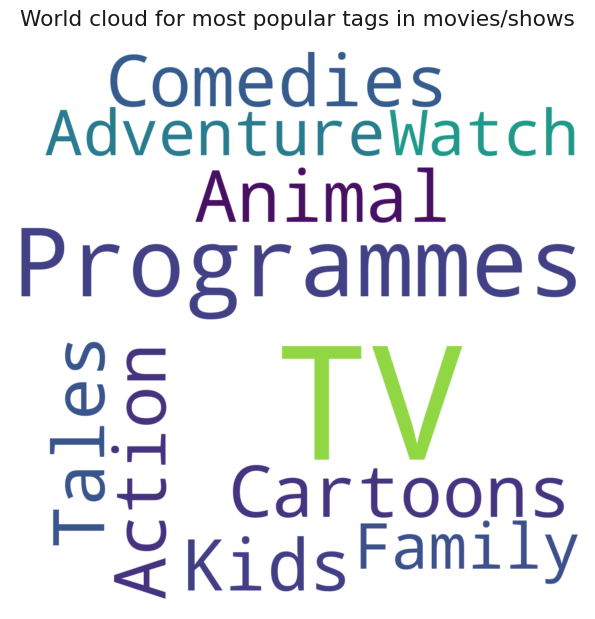

In [ ]:
wc = wordcloud.WordCloud(width = 1400, height = 1400, background_color ='white',min_font_size = 5).generate(" ".join(words_tags))             
plt.figure(figsize=(8,6))
plt.imshow(wc,interpolation="bilinear") 
plt.axis("off") 
plt.title("World cloud for most popular tags in movies/shows")
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
nlp = spacy.load('en')
df_summ = df.dropna(subset=['Summary'])
df_summ  = df_summ['Summary']
for tag in df_summ:
    doc = nlp(tag)
words_summ = [token.text for token in doc if not token.is_stop and not token.is_punct]

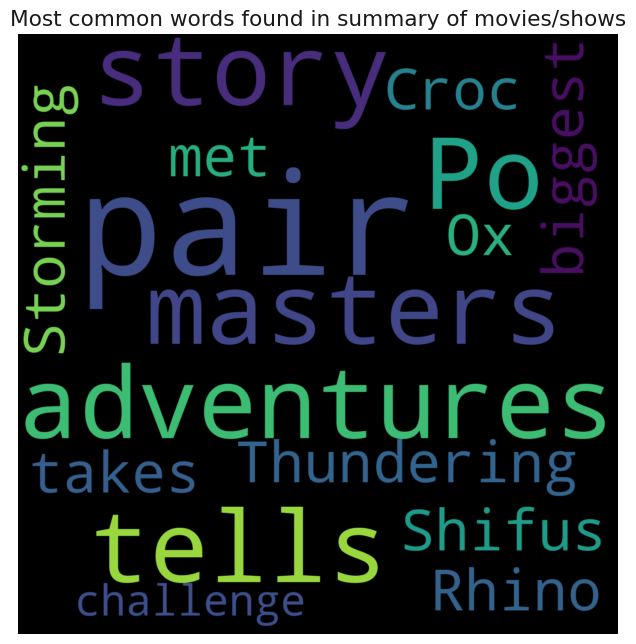

In [ ]:
wc = wordcloud.WordCloud(width = 1400, height = 1400, background_color ='black',  min_font_size = 5).generate(" ".join(words_summ)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wc,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most common words found in summary of movies/shows")  
plt.show()

In [ ]:
df_awards_nom_wom = df.dropna(subset=['Awards Nominated For','Awards Received'])
fig = px.scatter(df_awards_nom_wom, x='Awards Nominated For', y='Awards Received',hover_data=['Title'],title='Awards Nominated For vs Awards Received')
fig.update_layout(hovermode="x unified")
fig.show()

In [ ]:
df_movie_awr = df_movie.dropna(subset=['Awards Received'])
df_movie_awr = df_movie_awr.sort_values(by = 'Awards Received', ascending = False)
top_15_awr = df_movie_awr[:15]

fig = px.bar(top_15_awr, x='Title', y='Awards Received',hover_data=['Director','Writer'],
             title='Movies that Received most number awards with their Director and Writer names',
             color='Title')
fig.show()

In [ ]:
#Top then Directors who received most number of awards.
df_dir_mov_awr = df_movie_awr.groupby('Director')['Awards Received'].count().reset_index()
df_fir_mov_awr_10 = df_dir_mov_awr.sort_values(by='Awards Received',ascending=False)[:10]

fig = px.bar(df_fir_mov_awr_10, x='Awards Received', y='Director', title='Top 10 Directors and number of Awards they Received',color='Director',
             labels={'Awards Received': "Number of Awards Received"})
fig.show()

In [ ]:
df_ten_hgc = df.dropna(subset=['Hidden Gem Score'])
df_ten_hgc = df.sort_values(by = 'Hidden Gem Score', ascending = False)
print('Top 10 hidden gems\n',df_ten_hgc[:10]['Title'])

Top 10 hidden gems
 293              No Festival
15314          Horsin Around
205          The Dream House
7176              Conspiracy
1137     A Lion in the House
7170                Im Sorry
2906     Flavours of Romania
3276          Bye Bye London
5178        Regiment Diaries
3260            Numberblocks
Name: Title, dtype: object


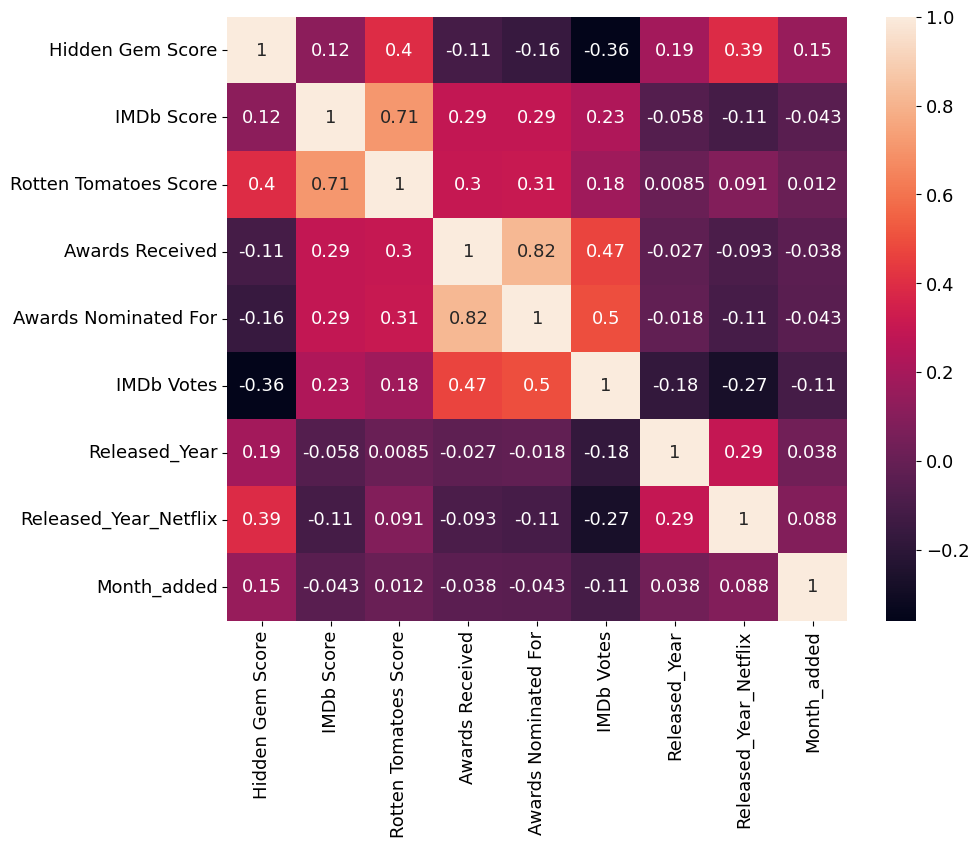

In [ ]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)
plt.show()

* Awards Nominated For and Awards Received are highly correlated with a value of 0.82
* Rotten Tomatoes Score and IMDb Scores are also positively correlated with a value of 0.71
* Interestingly a High IMDb Score or a High Rotten Tomatoes Score doesn't mean that show/movie is more likely be nominated for a award, their correlation value is just 0.29 and 0.31 respectively.